In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
#A good way to estimate sale Price of any house is by finding 
#mean sale price that houses are going for
data['mean_sale']=data['Sale_Price'].mean()
data['mean_sale'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sale, dtype: float64

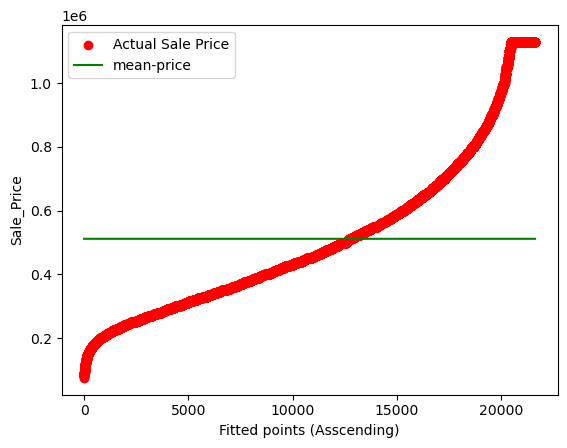

In [4]:
import matplotlib.pyplot as plt
#now we see how close we were to actual values
plt.figure(dpi=100)
k=range(0,len(data))
plt.scatter(k,data['Sale_Price'].sort_values(),color='red',label="Actual Sale Price")
plt.plot(k,data['mean_sale'].sort_values(),color='green',label="mean-price")
plt.xlabel('Fitted points (Asscending)')
plt.ylabel('Sale_Price')
plt.legend()

In [5]:
# imroving mean regression model
grades_mean=data.pivot_table(values='Sale_Price', columns='Overall Grade', aggfunc=np.mean)
grades_mean
#this gives us the mean sale price for each grade

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [6]:
#we create a new coloumn and to each house 
#we assign it's predicted sale price mean based on overall grade of the house
data['grade_mean']=0

for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade']==i]=grades_mean[i][0]
data['grade_mean'].head()

C:\Users\Adarshdeep Gupta\AppData\Local\Temp\ipykernel_18640\3805518401.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade']==i]=grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [7]:
gradewise_list=[]
for i in range(1,11):
    k=data["Sale_Price"][data["Overall Grade"]==i]
    gradewise_list.append(k)

In [8]:
classwise_list=[]
for i in range(1,11):
    k=data["Sale_Price"][data["Overall Grade"]==i]
    classwise_list.append(k)

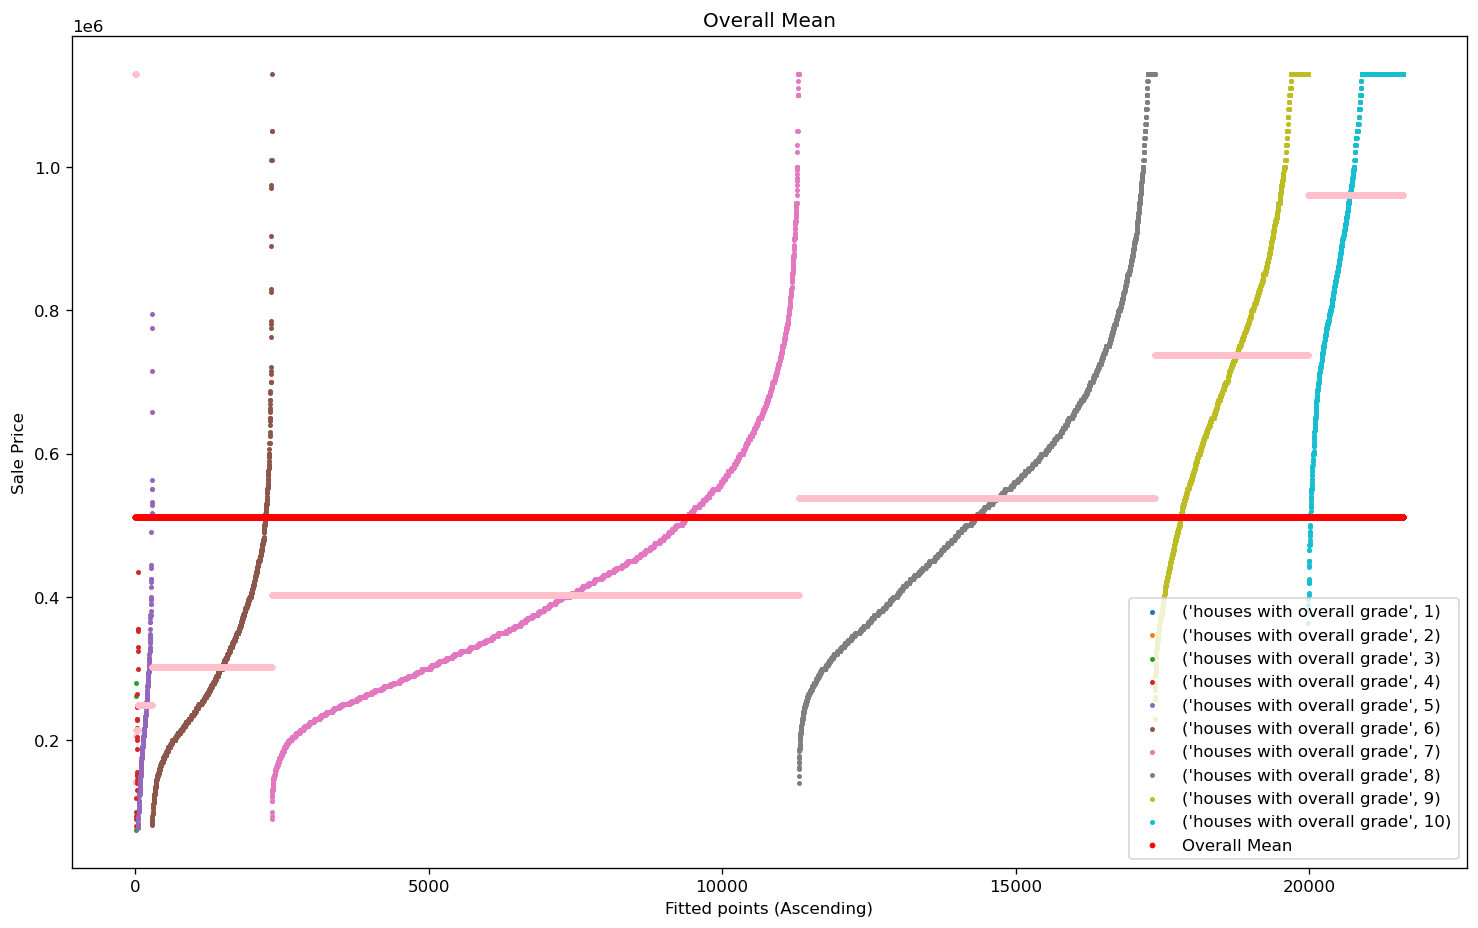

In [9]:
plt.figure(dpi=120,figsize=(15,9))

#Plotting "Sale_Price" gradewise
#z variable is for x-axis
z=0
for i in range(1,11):
    #definning x-axis using z
    points=[k for k in range(z,z+len(classwise_list[i-1]))]
    #Plotting
    plt.scatter ( points,
                classwise_list[i-1].sort_values(),
                label=('houses with overall grade',i),s=4)
    #Plotting gradewise mean
    plt.scatter( points,
               [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
               s=6, color='pink'
               )
    z=max(points)+1
    
#Plotting overall mean
plt.scatter([q for q in range(0,z)],
           data['mean_sale'],
           color='red',
           label='Overall Mean',
           s=6)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel('Sale Price')
plt.title('Overall Mean')
plt.legend(loc=4)

In [10]:
#Residual plot
mean_difference=data['mean_sale']-data['Sale_Price']
grade_mean_difference=data['grade_mean']-data['Sale_Price']


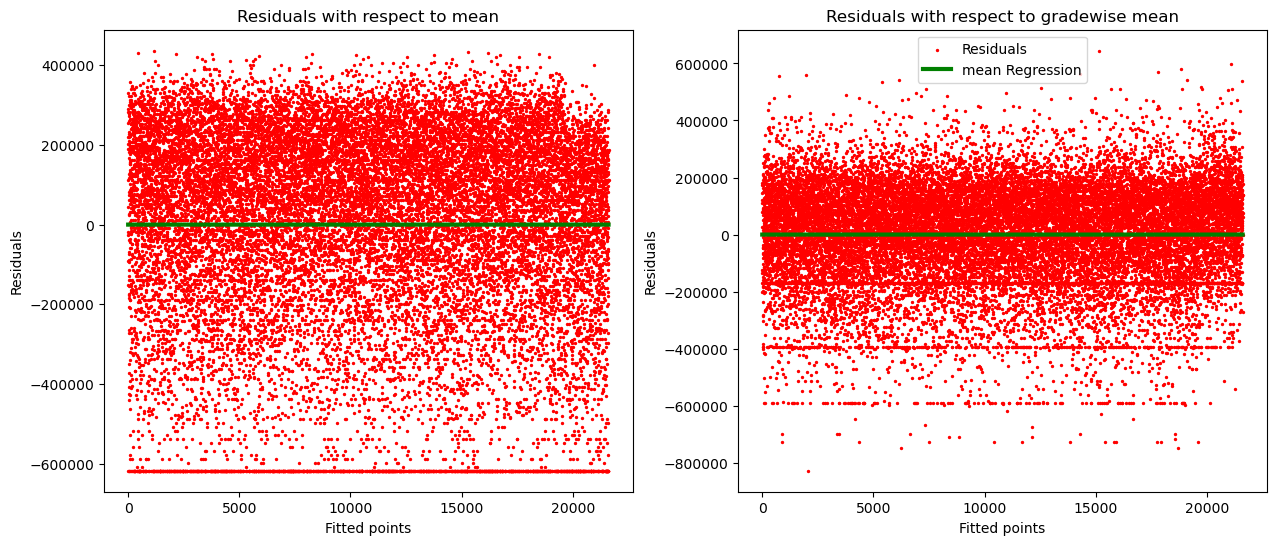

In [11]:
k=range(0,len(data))
l=[0 for i in range(len(data))]

plt.figure( figsize=(15,6), dpi=100 )

plt.subplot(1,2,1)
plt.scatter(k,mean_difference, color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label='mean Regression',linewidth=3)
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.title('Residuals with respect to mean')

plt.subplot(1,2,2)
plt.scatter(k,grade_mean_difference,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label='mean Regression',linewidth=3)
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals with respect to gradewise mean')

plt.legend( )
#Green line is residual line for a perfect model

In [12]:
#calculating mean error
cost=sum(mean_difference)/len(data)
print(round(cost,7))
#but this comes out to be 0 which shouldnt have been the case as our 
#model has inaccuracies. The reason this happens is that positive errors and
#negative errors are equal and they cancel out each other

0.0


In [13]:
sale_price=data["Sale_Price"].head(30)
flat_area=data['Flat Area (in Sqft)'].head(30)
sample_data=pd.DataFrame({'sale_price':sale_price,'flat_area':flat_area})

In [14]:
#we try to find the line of best fit
from sklearn.metrics import mean_squared_error as mse
def slope_Error( slope, intercept, sample_data):
    sale=[]
    for i in range(len(sample_data.flat_area)):
        tmp=sample_data.flat_area[i]*slope+intercept
        sale.append(tmp)
    MSE=mse(sample_data.sale_price, sale)
    return MSE

In [15]:
slope=[i/10 for i in range(0,5000)]
Cost=[]#cost is nothing but error
for i in slope:
    cost=slope_Error(slope=i, intercept=0, sample_data=sample_data)
    Cost.append(cost)

In [16]:
# Arraning in DAtaFrame
Cost_table=pd.DataFrame({
    'slope':slope,
    'Cost':Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


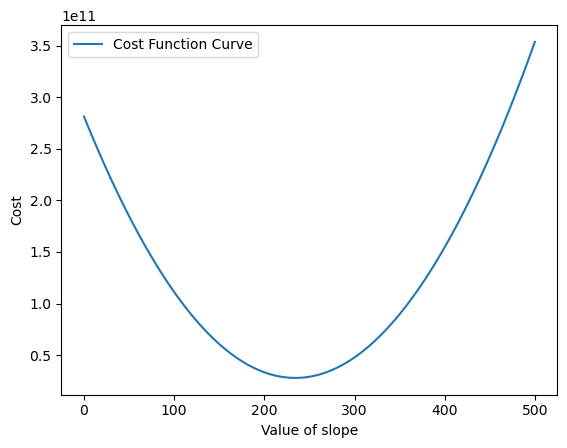

In [17]:
plt.plot(Cost_table.slope, Cost_table.Cost , label='Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [18]:
#thevalue of slope which gives minimum value of cost is best fit curve

In [23]:
def intercept_Error( slope, intercept, sample_data):
    sale=[]
    for i in range(len(sample_data.flat_area)):
        tmp=sample_data.flat_area[i]*slope+intercept
        sale.append(tmp)
    MSE=mse(sample_data.sale_price, sale)
    return MSE

In [24]:
intercept=[i for i in range(5000,50000)]
Cost=[]#cost is nothing but error
for i in intercept:
    cost=intercept_Error(slope=234, intercept=i, sample_data=sample_data)
    Cost.append(cost)

In [25]:
Cost_table=pd.DataFrame({
    'intercept':intercept,
    'Cost':Cost
})
Cost_table.tail()

,intercept,Cost
44995,49995,2.929862e+10
44996,49996,2.929870e+10
44997,49997,2.929878e+10
44998,49998,2.929886e+10
44999,49999,2.929894e+10


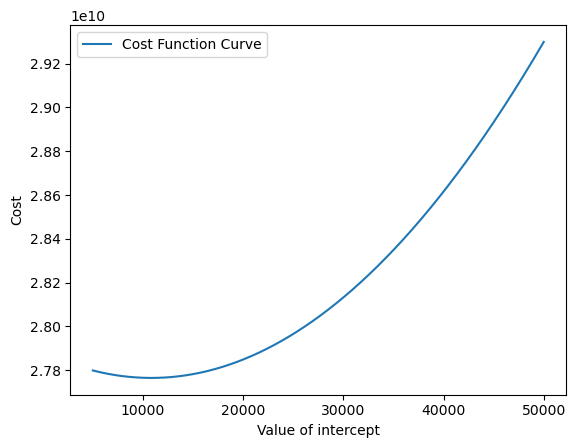

In [26]:
plt.plot(Cost_table.intercept, Cost_table.Cost , label='Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [27]:
#using such technique we learn m and c of line of best fit hence giving us
# the best linear regression line

In [28]:
#implementing Gradient Descent
def param_init(Y):
    m=0.1
    c=Y.mean()
    return m,c

In [29]:
def generate_predictions(m,c,X):
    prediction=[]
    for x in X:
        pred=(m*x)+c
        prediction.append(pred)
    return prediction

In [30]:
def compute_cost(prediction,Y):
    cost=np.sum(((prediction-Y)**2)/len(y))
    return cost

In [31]:
def gradients(prediction,Y,X):
    n=len(Y)
    Gm=2/n*np.sum((prediction-Y)*X)
    Gc=2/n*np.sum((prediction-Y))
    return Gm,Gc

In [32]:
def param_update(m_old,c_old,Gm_old,Gc_old,alpha):
    m_new=m_old-alpha*Gm_old
    c_new=c_old-alpha*Gc_old
    return m_new, c_new

In [33]:
def result(m,c,X,Y,cost,predictions,i):
    if i<max_iter-1:
        print("***** Gradient Descent has converged at iteration {} *****".format(i))
    else:
        print("***** Result after", max_tier,"iterations is: *****")
    plt.figure(figsize=(14,7),dpi=120)
    plt.scatter(X,Y,color='red',label='data points')
    label='final regression line: m= {}; c={}'.format(str(m),str(c))
    plt.plot(X,predictions,color='green',label=label)
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.title('final regression line')
    plt.legend()

In [34]:
#Refer Gradient Descent pynotebook for full code